### US Electronic Store Sales Analysis 

Sales analyis of an electronics store dataset. 
The key business questions answered: 
    1. What was the best month for sales and how much was made?
    2. What city had the highest sales?
    3. What is the best time to maximize sale likelihood?
    4. What products are often sold together?
    
Link to tableau dashboard: https://public.tableau.com/app/profile/ikenna4609/viz/ElectronicStoreSalesInsights/ESIncDashboard?publish=yes

### Import necessary libraries 

In [1]:
import pandas as pd
import glob #retrieves files/pathnames matching a specified pattern 
import os

### Merging 12 months of sales data into a single file 

In [21]:
path = 'C:\\Users\\ikennan\\Documents\\Python Scripts\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data'
output_path = 'C:\\Users\\ikennan\\Documents\\Python Scripts\\Pandas-Data-Science-Tasks-master\\SalesAnalysis'

files = [file for file in os.listdir(path)]
all_sales_data = pd.DataFrame() 

for file in files:
    df = pd.read_csv(os.path.join(path, file))
    all_sales_data = pd.concat([all_sales_data, df])
    
all_sales_data.to_csv(os.path.join(output_path, 'All_Sales.csv'), index=False)


### Read merged data

In [22]:
sales_df = pd.read_csv(os.path.join(output_path, 'All_Sales.csv'))
sales_df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


### Clean up data 

#### Drop rows of NaN

In [23]:
sales_df_nan = sales_df[sales_df.isna().any(axis=1)]

sales_df_nan

sales_df = sales_df.dropna(how='all') #If all values are NA, drop that row or column.
sales_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Find and delete 'Or'

In [24]:
sales_df = sales_df.loc[~sales_df['Order Date'].str.contains('Or')]
sales_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Remove duplicates 

In [25]:
sales_df = sales_df[['Order ID','Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']].drop_duplicates()

sales_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Augment data with additional columns 

### Add 'Month' column

In [26]:
sales_df['Month'] = sales_df['Order Date'].str[0:2] #alternatively, pd.to_datetime() - convert to datetime
sales_df['Month'] = sales_df['Month'].astype('int32') #convert to int #alternatively, sales_df['Order Date'].dt.month

sales_df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Add 'Sales Amount' column

In [27]:
#convert datatypes
sales_df['Quantity Ordered'] = sales_df['Quantity Ordered'].astype('int32') 
sales_df['Price Each'] = sales_df['Price Each'].astype('float64')

sales_df.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [28]:
sales_df['Sales Amount'] = sales_df['Quantity Ordered'] * sales_df['Price Each']

### Add 'Cities' Column

In [29]:
sales_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Amount
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [30]:
def get_city(address):
    return address.str.split(',').str[1]

def get_state(address):
    return address.str.split(',').str[2].str.split(' ').str[1]

address = sales_df['Purchase Address']
sales_df['City'] = get_city(address) + " " + get_state(address)
#sales_df['City'] = get_city(address) 


#sales_df['State'] = get_state(address)

sales_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Amount,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA


In [31]:
sales_df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales Amount', 'City'],
      dtype='object')

### Q1: What was the best month for sales? How much was earned that month?

In [32]:
totals = sales_df.groupby(['Month']).sum()
totals

totals.to_excel('C:\\Users\\ikennan\\Documents\\Python Scripts\\Pandas-Data-Science-Tasks-master\\Tableau Visualisation\\Total_Sales.xlsx')
totals

,Quantity Ordered,Price Each,Sales Amount
Month,,,
1,10893,1.810925e+06,1.821413e+06
2,13431,2.186940e+06,2.200078e+06
3,16979,2.789085e+06,2.804973e+06
4,20536,3.366219e+06,3.389218e+06
5,18653,3.133135e+06,3.150616e+06
6,15234,2.560504e+06,2.576280e+06
7,16054,2.631225e+06,2.646461e+06
8,13429,2.226964e+06,2.241083e+06
9,13091,2.081898e+06,2.094466e+06


<function matplotlib.pyplot.show(*args, **kw)>

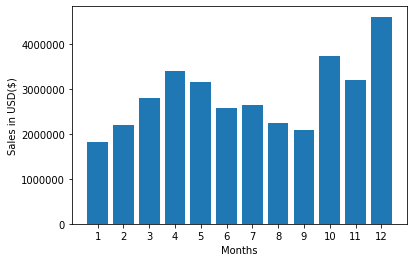

In [33]:
#plot a bar chart
import matplotlib.pyplot as plt 

months = range(1,13)
plt.bar(months, totals['Sales Amount'])
plt.xticks(months) #show every month 
plt.ylabel('Sales in USD($)')
plt.xlabel('Months')
plt.show

### Q2 What city had the highest sales?

In [34]:
sales_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Amount,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA


In [36]:
sales_per_city = sales_df.groupby(['City']).sum()
sales_per_city

,Quantity Ordered,Price Each,Month,Sales Amount
City,,,,
Atlanta GA,16584,2.778609e+06,104649,2.794199e+06
Austin TX,11137,1.808340e+06,69720,1.818044e+06
Boston MA,22494,3.634398e+06,140898,3.658628e+06
Dallas TX,16707,2.750026e+06,104447,2.765374e+06
Los Angeles CA,33247,5.417172e+06,208020,5.448304e+06
New York City NY,27903,4.632921e+06,175557,4.661867e+06
Portland ME,2746,4.467524e+05,17119,4.493214e+05
Portland OR,11291,1.859836e+06,70517,1.870011e+06
San Francisco CA,50169,8.204001e+06,314949,8.254744e+06


In [37]:
sales_per_city.to_excel('C:\\Users\\ikennan\\Documents\\Python Scripts\\Pandas-Data-Science-Tasks-master\\Tableau Visualisation\\Sales_Per_City.xlsx')

<function matplotlib.pyplot.show(*args, **kw)>

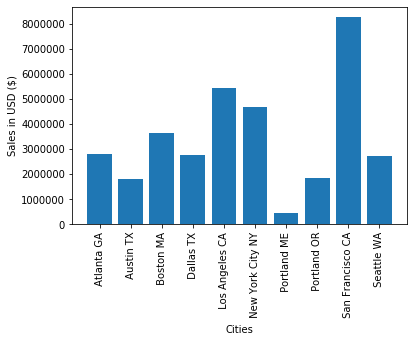

In [18]:
import matplotlib.pyplot as plt 

cities = [city for city, df in sales_df.groupby('City')]

plt.bar(cities, sales_per_city['Sales Amount'])
plt.xticks(cities, rotation='vertical')
plt.ylabel('Sales in USD ($)')
plt.xlabel('Cities')
plt.show

In [19]:
cities = [city for city, df in sales_df.groupby('City')]
cities

[' Atlanta GA',
 ' Austin TX',
 ' Boston MA',
 ' Dallas TX',
 ' Los Angeles CA',
 ' New York City NY',
 ' Portland ME',
 ' Portland OR',
 ' San Francisco CA',
 ' Seattle WA']

### Q3. What time should adverts be displayed to maximize the likelihood of customer's purchasing?

In [20]:
sales_df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Amount,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [21]:
# convert order date to datetime type

sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])

sales_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Amount,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA


In [22]:
#add 'Hour' and 'Minute' columns 

sales_df['Hour'] = sales_df['Order Date'].dt.hour
sales_df['Minute'] = sales_df['Order Date'].dt.minute

sales_df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Amount,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


<function matplotlib.pyplot.show(*args, **kw)>

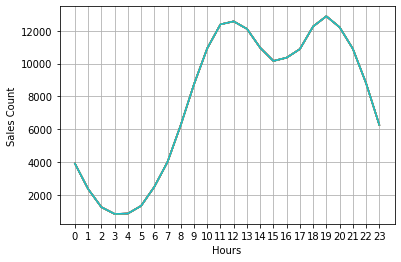

In [23]:
hours = [hour for hour, df in sales_df.groupby('Hour')]

plt.plot(hours, sales_df.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Sales Count')
plt.grid()
plt.show

#further breakdown by city using tableau, focus on top 4

In [24]:
sales_df[['Hour', 'Quantity Ordered', 'Sales Amount', 'City']].to_excel('C:\\Users\\ikennan\\Documents\\Python Scripts\\Pandas-Data-Science-Tasks-master\\Tableau Visualisation\\Sales_Count_Per_Hour.xlsx', index=False)

### Q4. What products are most often sold together?

In [25]:
df = sales_df[sales_df['Order ID'].duplicated(keep=False)] #returns duplicate rows

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) #allows you to execute a function for each value of the DataFrame.

df = df[['Order ID', 'Grouped']].drop_duplicates() #drop duplicate order id and group rows

df.to_excel('C:\\Users\\ikennan\\Documents\\Python Scripts\\Pandas-Data-Science-Tasks-master\\Tableau Visualisation\\Products_Grouping.xlsx', index=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
# count pairs of products

from itertools import combinations 
from collections import Counter 

count = Counter() 

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
#count.most_common(5)
    
for key, value in count.most_common(10): #more readable
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [27]:
df = pd.read_excel('C:\\Users\\ikennan\\Documents\\Python Scripts\\Pandas-Data-Science-Tasks-master\\Tableau Visualisation\\Products_Grouping.xlsx')

df

,Order ID,Grouped
0,176560,"Google Phone,Wired Headphones"
1,176574,"Google Phone,USB-C Charging Cable"
2,176586,"AAA Batteries (4-pack),Google Phone"
3,176672,"Lightning Charging Cable,USB-C Charging Cable"
4,176681,"Apple Airpods Headphones,ThinkPad Laptop"
...,...,...
6874,259277,"iPhone,Wired Headphones"
6875,259297,"iPhone,Lightning Charging Cable"
6876,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
6877,259314,"Wired Headphones,AAA Batteries (4-pack)"


### Q5. What product sold the most?

In [28]:
sales_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Amount,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA,20,56
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA,16,0
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA,7,39
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA,17,30


In [29]:
sales_per_product = sales_df.groupby(['Product']).sum()

sales_per_product.to_excel('C:\\Users\\ikennan\\Documents\\Python Scripts\\Pandas-Data-Science-Tasks-master\\Tableau Visualisation\\Sales_Per_Product.xlsx')

In [30]:
sales_per_product 

,Quantity Ordered,Price Each,Month,Sales Amount,Hour,Minute
Product,,,,,,
20in Monitor,4126,450739.02,29319,453818.74,58729,122096
27in 4K Gaming Monitor,6239,2427687.75,44396,2433147.61,90841,184129
27in FHD Monitor,7541,1124625.02,52484,1131074.59,107422,219659
34in Ultrawide Monitor,6192,2346058.26,43258,2352898.08,88957,183318
AA Batteries (4-pack),27615,78942.72,145423,106041.60,298077,608560
AAA Batteries (4-pack),30986,61629.88,146149,92648.14,296904,611350
Apple Airpods Headphones,15637,2328750.00,109304,2345550.00,222938,454935
Bose SoundSport Headphones,13430,1329667.02,93918,1342865.70,192077,391667
Flatscreen TV,4813,1438200.00,34172,1443900.00,68719,142629


<function matplotlib.pyplot.show(*args, **kw)>

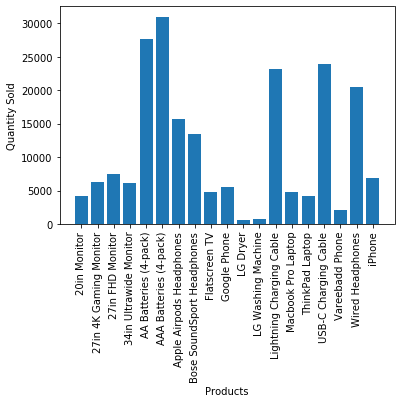

In [34]:
products = [Product for Product, df in sales_df.groupby(['Product'])]
products

plt.bar(products, sales_per_product['Quantity Ordered'])
plt.xticks(products, rotation='vertical')
plt.xlabel('Products')
plt.ylabel('Quantity Sold')
plt.show()

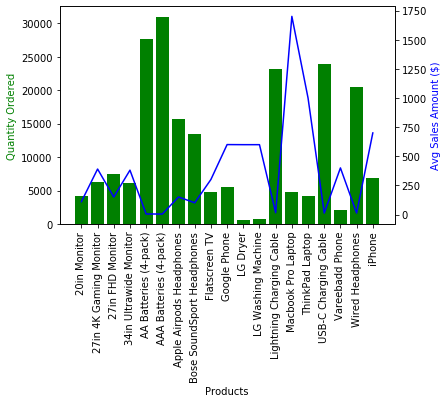

In [65]:
#overlay sales amount and quantity ordered
prices = sales_df.groupby(['Product']).mean()['Sales Amount']
qty_ordered = sales_df.groupby(['Product']).sum()['Quantity Ordered']

fig, ax1 = plt.subplots() #draw multiple plots in one figure
ax2 = ax1.twinx() #create tiwn axes sharing the x-axis(products)

ax1.bar(products, qty_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Avg Sales Amount ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical')

plt.show()